### Problem Statement:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
### Implimentations:
Create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

Imported Basic Library

In [86]:
df_fraud=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df_fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Read Dataset and displayed head of dataset

In [3]:
df_fraud.drop('_c39',axis=1,inplace=True)

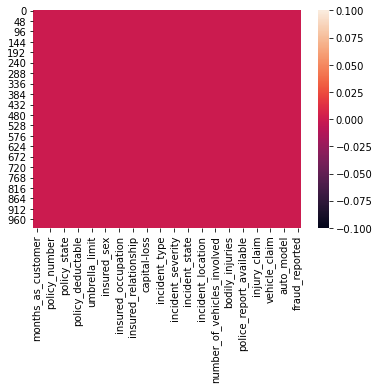

In [4]:
#lets chcek the null values in the dataset
sns.heatmap(df_fraud.isnull())

Graphysical Representations of null value.We can see in the entire dataset there are no null values.

In [5]:
#lets do Lable enconding coding to make more features 
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
le_count = 0
# Iterate through the columns
for col in df_fraud:
    if df_fraud[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_fraud[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_fraud[col])
            # Transform both training and testing data
            df_fraud[col] = le.transform(df_fraud[col])     
            # Keep track of how many columns were label encoded
            le_count += 1       
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [6]:
df_fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,1,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,1,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,0,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,0,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,1,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [56]:
df_fraud.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_hobbies_Other,insured_hobbies_chess,insured_hobbies_cross-fit,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,...,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.017895,0.060925,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544,-0.004253,0.009288,-0.004783,0.025164,-0.005078,-2.088569e-02,0.048620,-0.034985,-0.029863,-0.041588,0.059231,0.012031,-0.013436,-0.056918,0.059418,0.016770,-0.049103,-0.021252,-0.021699,0.028646,0.028707,...,-0.056849,-0.026295,0.033914,-0.029489,0.002554,0.008323,-0.006971,0.023087,-0.012810,-0.045072,-0.016093,-0.014693,0.031986,-0.036265,0.020206,0.029881,0.018258,-0.038703,0.020135,-0.014281,-0.006653,0.001425,0.005488,-0.051763,0.073415,-0.022146,-0.004035,-0.028079,-0.045248,0.012906,-0.044926,0.015478,-0.039476,0.016515,0.095613,-0.032650,0.041350,0.018059,-0.037225,0.031905
age,0.922098,1.000000,0.029188,0.014404,0.018126,0.025604,0.073337,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143,0.021654,-0.018196,-0.003827,0.011516,0.002581,-1.466615e-02,0.039960,-0.014266,-0.038122,-0.045159,0.061883,-0.002052,0.000496,-0.065079,0.070745,0.015974,-0.062698,-0.001719,-0.031489,0.023076,0.036904,...,-0.054818,-0.019249,0.019616,-0.032071,0.002279,0.017137,0.007948,0.011606,-0.012270,-0.045199,-0.023852,-0.005695,0.034066,-0.037225,0.023285,0.035960,0.012292,-0.027979,-0.003866,-0.003561,-0.000748,0.004067,-0.003408,-0.045002,0.064987,-0.020441,-0.008463,-0.022635,-0.022129,0.008654,-0.026565,0.003279,-0.037517,0.028231,0.083643,-0.034264,0.041219,0.002485,-0.046058,0.030235
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817,0.013938,-0.046528,0.031252,-0.001592,-0.002522,4.281870e-03,0.010588,-0.000460,-0.032382,-0.035130,0.057826,-0.016105,0.019777,0.006089,0.005807,-0.015659,-0.009229,0.012232,0.016829,0.017389,0.013268,...,-0.024226,0.026132,-0.034679,0.023446,-0.026377,0.017219,-0.041599,0.019962,0.042236,-0.005560,-0.012223,0.026339,-0.009965,0.015157,-0.008100,0.060253,0.003622,-0.015448,-0.010675,-0.044282,-0.013490,-0.001618,0.015770,-0.014288,-0.022899,0.038036,0.008132,0.065264,-0.008173,-0.005159,0.003737,0.007642,-0.010615,0.025428,-0.038736,-0.000659,-0.056536,0

In [7]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df_fraud:
    if df_fraud[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df_fraud[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value          
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
14,incident_location,1000
0,policy_bind_date,951
7,incident_date,60
18,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
17,auto_make,14
3,insured_education_level,7
12,incident_state,7
13,incident_city,7


In [8]:
# droping columns based on above result
df_fraud.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

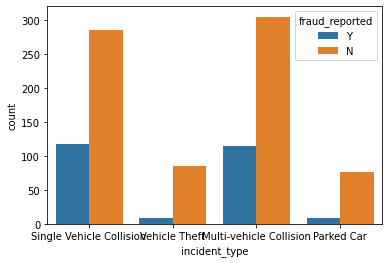

In [90]:
sns.countplot(x='incident_type',hue='fraud_reported',data=df_fraud)

Theft incident case high fraud reported 

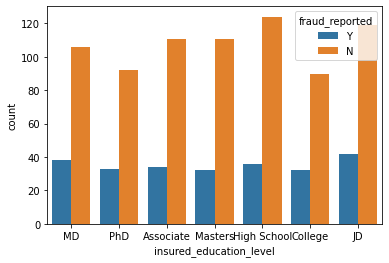

In [89]:
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df_fraud)

High school lavel educations reported more fraud case

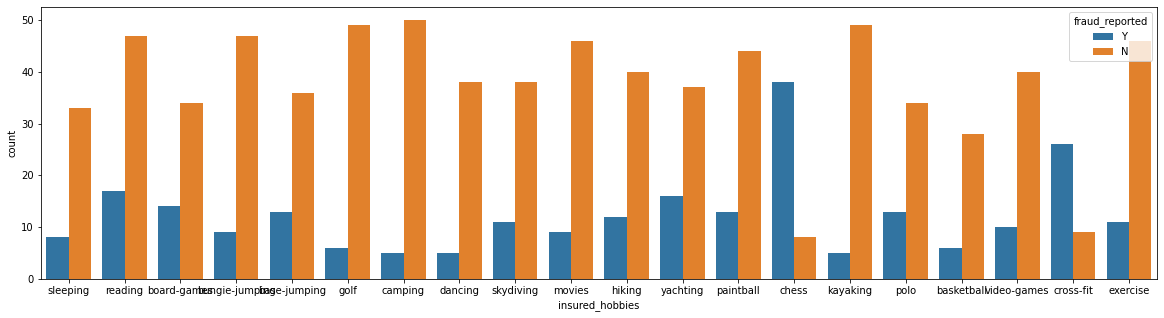

In [92]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df_fraud)

Camping hobbies person high fraud reported

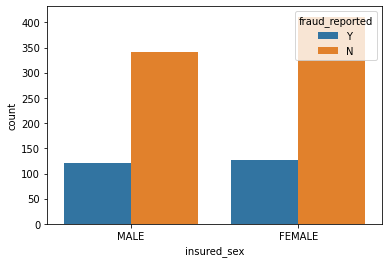

In [82]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=df_fraud)

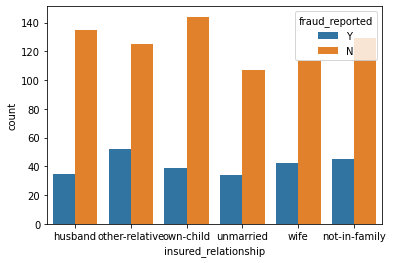

In [83]:
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df_fraud)

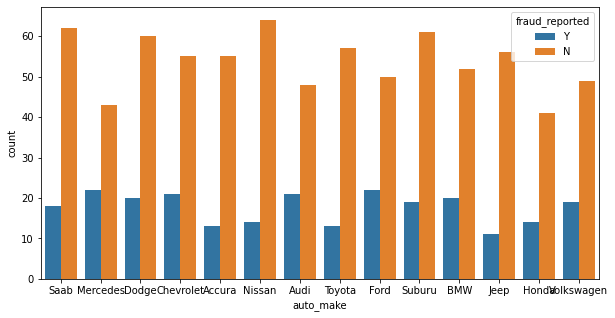

In [76]:
df_fraud['insured_hobbies']=df_fraud['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='auto_make',hue='fraud_reported',data=df_fraud)

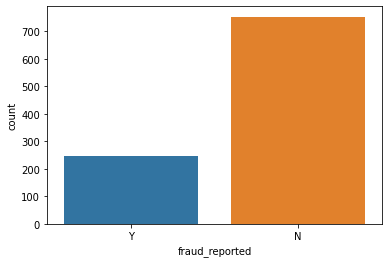

In [87]:
sns.countplot(x='fraud_reported',data=df_fraud)

Data is imbalanced.

In [84]:
df_fraud = pd.get_dummies(df_fraud)
print('Training Features shape: ', df_fraud.shape)

Training Features shape:  (1000, 2177)


As per aboveb fraud reported is less as compaired to not reported

In [14]:
y=df_fraud['fraud_reported']
x= df_fraud.drop('fraud_reported',axis=1)

Seprated data set into dependent and independent variable

In [15]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_hobbies_Other,insured_hobbies_chess,insured_hobbies_cross-fit,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,...,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_?,property_damage_NO,property_damage_YES,police_report_available_?,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,-0.489529,1.076953,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653,-0.183440,-0.714545,-0.670280,1.356801,-0.732187,1.359780,-0.654654,-0.411814,-0.372763,-0.436436,-0.438058,2.438123,-0.408486,-0.377964,0.296883,-0.219586,-0.190445,2.209605,-0.45897,-0.463753,-0.473276,-0.405147,-0.42829,...,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,-0.351562,-0.595830,-0.153432,-0.175863,1.741338,-0.351562,-0.52644,-0.423374,2.389856,-0.405147,-0.411814,-0.372763,-0.393363,-0.431555,-0.750000,-0.714545,1.520282,-0.722544,-0.722544,1.478078,-0.270114,-0.272239,-0.278543,-0.286794,-0.294884,-0.278543,-0.241249,-0.267976,-0.263664,-0.290859,3.391165,-0.294884,-0.274352,-0.270114
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.461008,1.076953,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346,0.315491,-0.714545,1.491914,-0.737028,-0.732187,1.359780,-0.654654,-0.411814,-0.372763,-0.436436,-0.438058,2.438123,-0.408486,-0.377964,0.296883,-0.219586,-0.190445,-0.452570,-0.45897,2.156320,-0.473276,-0.405147,-0.42829,...,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,-0.351562,-0.595830,-0.153432,-0.175863,-0.574271,2.844452,-0.52644,-0.423374,-0.418435,-0.405147,-0.411814,-0.372763,2.542181,-0.431555,1.333333,-0.714545,-0.657773,1.383999,-0.722544,-0.676554,-0.270114,-0.272239,-0.278543,-0.286794,-0.294884,-0.278543,-0.241249,-0.267976,3.792706,-0.290859,-0.294884,-0.294884,-0.274352,-0.270114
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,-0.984885,-0.928546,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565,0.315491,-0.714545,-0.670280,1.356801,1.365771,-0.735413,-0.654654,-0.411814,-0.372763,-0.436436,-0.438058,-0.410152,-0.408486,2.645751,0.296883,-0.219586,-0.190445,-0.452570,-0.45897,-0.463753,2.112932,-0.405147,-0.42829,...,-0.314485,-0.493742,-0.535725,-0.316402,-0.496873,1.557131,-0.351562,1.678331,-0.153432,-0.175863,-0.574271,-0.351562,-0.52644,-0.423374,2.389856,-0.405147,-0.411814,-0.372763,-0.393363,-0.431555,-0.750000,1.399493,-0.657773,-0.722544,1.383999,-0.676554,-0.270114,-0.272239,-0.278543,-0.286794,3.391165,-0.278543,-0.241249,-0.267976,-0.2

Scalled data in same scale

In [16]:
from sklearn.decomposition import PCA
pca=PCA()
test=pca.fit(x)

For Decomposition of columns using PCA

In [17]:
test.explained_variance_ratio_

array([7.52307969e-02, 2.93748681e-02, 2.43871730e-02, 2.27408581e-02,
       2.10790129e-02, 1.98263038e-02, 1.95471860e-02, 1.93288145e-02,
       1.90931030e-02, 1.87138209e-02, 1.84273140e-02, 1.82801183e-02,
       1.76745145e-02, 1.71465620e-02, 1.70299345e-02, 1.66681262e-02,
       1.63975113e-02, 1.61131024e-02, 1.59171569e-02, 1.57256857e-02,
       1.56595222e-02, 1.53773413e-02, 1.49861033e-02, 1.47517111e-02,
       1.45892355e-02, 1.44408881e-02, 1.41291635e-02, 1.38116128e-02,
       1.36477366e-02, 1.34334032e-02, 1.32205335e-02, 1.28766428e-02,
       1.27077770e-02, 1.26772997e-02, 1.25028536e-02, 1.22928904e-02,
       1.22445727e-02, 1.21642896e-02, 1.20560831e-02, 1.15871679e-02,
       1.15418258e-02, 1.13937207e-02, 1.13209151e-02, 1.11695169e-02,
       1.10983864e-02, 1.09913957e-02, 1.07697672e-02, 1.05925146e-02,
       1.03811222e-02, 1.03691443e-02, 1.02234001e-02, 1.02045286e-02,
       9.93218212e-03, 9.79211253e-03, 9.59694130e-03, 9.45933436e-03,
      

In [18]:
var_cumsum=np.cumsum(test.explained_variance_ratio_)*100
var_cumsum

array([  7.52307969,  10.4605665 ,  12.89928379,  15.1733696 ,
        17.2812709 ,  19.26390128,  21.21861987,  23.15150132,
        25.06081162,  26.93219371,  28.7749251 ,  30.60293694,
        32.37038839,  34.08504459,  35.78803804,  37.45485066,
        39.09460179,  40.70591203,  42.29762773,  43.87019629,
        45.43614851,  46.97388264,  48.47249297,  49.94766409,
        51.40658764,  52.85067645,  54.2635928 ,  55.64475408,
        57.00952775,  58.35286807,  59.67492143,  60.96258571,
        62.2333634 ,  63.50109337,  64.75137874,  65.98066778,
        67.20512505,  68.42155401,  69.62716232,  70.78587912,
        71.9400617 ,  73.07943377,  74.21152527,  75.32847696,
        76.4383156 ,  77.53745516,  78.61443188,  79.67368334,
        80.71179556,  81.74870999,  82.77105   ,  83.79150286,
        84.78472107,  85.76393232,  86.72362645,  87.66955989,
        88.59710184,  89.51329865,  90.40806841,  91.29493067,
        92.16027888,  93.01779219,  93.8627769 ,  94.69

In [19]:
k=np.argmax(var_cumsum>90)
print('no of components explaning 90% variance: ',k)

no of components explaning 90% variance:  58


Text(0, 0.5, 'Comulative explaind variance')

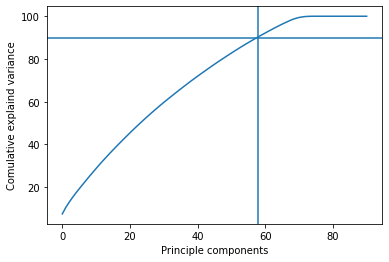

In [20]:
plt.axvline(x=k)
plt.axhline(y=90)
plt.plot(var_cumsum)
plt.xlabel('Principle components')
plt.ylabel('Comulative explaind variance')

Graphysical representations of 90% variance

In [21]:
final_pca=PCA(n_components=58)
final=final_pca.fit_transform(x)

No of components explaning 90% variance:  58

In [22]:
x_final=pd.DataFrame(final)
x_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,-1.259464,1.402795,0.307405,-1.013118,0.919811,1.522175,2.490132,0.571040,-0.257958,1.074278,-1.026065,-0.630567,1.604741,0.621624,2.135445,-0.405214,1.040493,-0.685938,-0.309854,-0.379258,-1.092060,-1.811372,0.553178,0.885463,0.555738,-0.136085,-2.722667,2.690411,1.107040,-1.128714,-0.359840,-0.921159,-0.416071,0.463551,-0.648524,0.739417,-0.249687,0.147056,-0.658401,1.201470,-0.187338,-0.739018,0.698488,0.616514,1.068531,-0.078809,-0.955886,0.550502,0.148600,0.611499,-0.325395,-0.059783,0.468089,0.398783,0.610787,-0.323801,-0.799992,0.096581
1,4.601331,0.245622,0.670793,-0.679436,-1.023431,0.150787,0.083650,1.127324,1.058897,-0.089512,0.858969,0.270160,-0.930245,1.780626,-0.702508,-1.239296,-0.351369,2.436561,-0.328220,0.387737,-1.014442,-1.941652,0.103223,0.241986,0.830997,-0.319145,0.753281,-0.859503,1.138375,0.446931,-2.113677,0.019642,1.214128,0.542859,-0.811228,-1.522289,-0.249485,1.220517,1.747836,-0.515302,-1.250985,0.737366,1.735119,-0.462453,2.376546,-0.665400,-2.164104,1.159263,-1.980243,-0.720493,-1.624764,0.759389,1.270579,0.458245,2.083027,-0.307549,-0.697010,-0.790940
2,0.386277,-2.021371,-0.469192,-0.094966,1.699018,-1.606880,-1.094410,-0.675730,-0.741265,-1.083029,-0.080166,0.875545,-0.960769,0.272739,-0.181164,-0.434149,-1.974112,-1.261823,-0.006981,-1.859058,-1.317354,0.036173,-0.479114,0.346373,-0.537832,-0.939483,0.422545,0.336721,2.618434,-1.167906,2.964360,0.729960,-1.544536,0.219533,0.205332,-0.026452,1.128363,0.205299,-0.857206,-0.153268,0.110744,-0.250538,-0.195387,0.009897,0.058708,-0.233215,-2.680727,-0.587773,0.218875,-1.234017,1.295632,1.992013,1.774051,0.783720,-1.075347,0.811254,-0.379650,0.192101
3,-0.235374,1.419678,0.152773,-1.388384,0.263196,-0.962707,1.981212,-1.760849,2.925926,-0.652078,-0.639520,2.517500,0.494036,1.104084,-0.628208,-0.969061,-1.027298,-0.396365,0.513843,1.203132,-0.610352,1.786749,2.675819,0.402171,3.345290,-0.568230,3.576972,2.953281,-0.243220,-0.136135,1.153192,1.197086,0.084587,-1.141106,1.379125,0.209727,0.550488,-1.480616,-1.659243,0.610943,-0.769194,1.824261,-0.272939,0.908504,-0.054482,0.918554,0.101800,0.177927,0.685444,1.488563,0.045614,1.305157,0.359349,-0.396988,0.537193,2.238957,-1.991672,-0.785583
4,5.279175,0.061921,0.966010,-1.578001,0.818780,-2.384847,-0.049722,-1.402176,-1.024095,0.264319,2.885043,0.893769,0.329614,-0.685602,1.574025,-0.927119,-0.546632,0.603331,0.172116,-0.290272,0.783917,0.803248,0.258305,0.470696,0.151266,-1.011843,2.544765,-0.052355,-0.228191,2.468962,0.531416,-0.489047,1.530964,-0.010410,0.480990,0.944579,0.033019,1.043072,0.616407,0.029046,-0.972618,-1.480065,-0.290459,-0.202553,0.776414,0.849869,1.798188,-1.113124,1.406443,-1.270233,0.274711,1.440708,-0.639619,-0.199646,1.407206,0.087494,-0.925768,-0.261222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.875186,2.902622,-1.531975,0.267603,-0.082040,-2.234406,0.232529,-0.732949,-0.477340,-1.332915,2.883094,-0.698442,-0.464934,0.253073,-0.497981,0.765951,0.001047,-1.691327,0.194922,2.612076,0.050233,-0.155318,-1.838280,-1.423338,0.928753,0.923717,-0.341980,-1.158546,-2.868742,-1.394615,-0.407986,0.035820,1.159381,1.605041,-1.304041,1.168212,1.455872,0.070015,-0.325827,1.192227,1.527853,1.496397,0.955986,0.291511,0.171598,0.008232,0.088759,-0.245027,-0.553998,0.340750,1.278929,-0.586915,-0.855456,-0.543396,-0.280710,-1.004296,-0.849473,-0.499014
996,-3.838660,2.073111,-0.581694,-0.777027,-0.244820,-1.726209,-0.025990,-0.843803,1.627005,-1.653851,-2.508313,-3.109542,1.159508,-1.216603,0.153041,-0.822648,1.421615,-0.934718,0.295493,0.248282,-0.278841,1.254580,1.243100,-0.159946,-0.651153,-1.347146,-0.293939,0.845937,-0.157790,-0.9

Reduce columns 91 to 58 using PCA.

In [23]:
print(x_final.skew())

0     1.382231
1     0.070562
2     1.034359
3     0.713280
4     0.213707
5     0.062264
6     0.209728
7    -0.021248
8     0.034376
9     0.069123
10    0.257550
11    0.069844
12    0.002544
13    0.004716
14    0.128125
15    0.278564
16    0.000688
17   -0.008152
18    0.000953
19    0.154615
20    0.044798
21   -0.006241
22    0.082661
23    0.145775
24    0.302828
25    0.087596
26    0.147204
27    0.104507
28    0.118463
29    0.016486
30    0.220968
31   -0.060353
32    0.074292
33   -0.047260
34    0.090987
35   -0.035494
36    0.198259
37   -0.168953
38    0.388837
39    0.004787
40    0.094947
41    0.094949
42    0.040961
43    0.186649
44    0.185115
45   -0.070797
46    0.096787
47    0.137399
48    0.176880
49    0.070910
50    0.116670
51    0.122994
52   -0.081430
53    0.187501
54    0.144102
55    0.195089
56    0.078569
57    0.001258
dtype: float64


In [24]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x_final,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

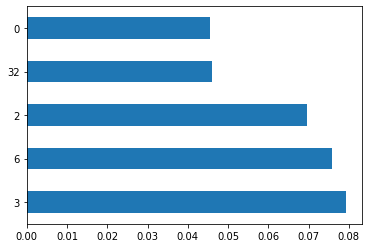

In [25]:
feat_importances = pd.Series(model.feature_importances_, index=x_final.columns)
feat_importances.nlargest(5).plot(kind='barh')

Graphysical Representations of top 5 important features

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_final)
x=sc.transform(x_final)
x=pd.DataFrame(x,columns=x_final.columns)

Converted features to common scale as we will use logistic regression also

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,df_x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Data is imbalance so applied SMOTE and  we will focus on auc-roc score and build a functions for finding random state where auc roc is maximum.

In [28]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,x,y)

auc roc score corresponding to  42  is  0.8218002432761183
auc roc score corresponding to  43  is  0.8386268414650628
auc roc score corresponding to  44  is  0.8350452763887012
auc roc score corresponding to  45  is  0.835856196783349
auc roc score corresponding to  46  is  0.858764697932153
auc roc score corresponding to  47  is  0.8526827949722935
auc roc score corresponding to  48  is  0.8317340181105555
auc roc score corresponding to  49  is  0.7978105149344505
auc roc score corresponding to  50  is  0.8697796999594539
auc roc score corresponding to  51  is  0.8353155831869172
auc roc score corresponding to  52  is  0.8722800378429517
auc roc score corresponding to  53  is  0.8182186781997567
auc roc score corresponding to  54  is  0.8317340181105555
auc roc score corresponding to  55  is  0.8794431679956751
auc roc score corresponding to  56  is  0.8493715366941477
auc roc score corresponding to  57  is  0.8526827949722935
auc roc score corresponding to  58  is  0.8791728611974592

82

Using logistic regression find max auc roc score corresponding to  82  is  0.913366671171779982.

In [29]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.857970248231743
standard deviation in roc auc score for logistic classifier:  0.048531318377936616
[0.836      0.82133333 0.80091904 0.91782673 0.91377213]


In [31]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
max_aucroc_score(dc,x,y)

auc roc score corresponding to  42  is  0.6430598729558048
auc roc score corresponding to  43  is  0.5956210298689013
auc roc score corresponding to  44  is  0.6287336126503582
auc roc score corresponding to  45  is  0.6323151777267197
auc roc score corresponding to  46  is  0.6866468441681308
auc roc score corresponding to  47  is  0.6325854845249358
auc roc score corresponding to  48  is  0.5512231382619273
auc roc score corresponding to  49  is  0.608595756183268
auc roc score corresponding to  50  is  0.6965806190025678
auc roc score corresponding to  51  is  0.6361670496012976
auc roc score corresponding to  52  is  0.6767130693336938
auc roc score corresponding to  53  is  0.5953507230706853
auc roc score corresponding to  54  is  0.6736721178537639
auc roc score corresponding to  55  is  0.6590755507501014
auc roc score corresponding to  56  is  0.5876469793215299
auc roc score corresponding to  57  is  0.6157588863359914
auc roc score corresponding to  58  is  0.645560210839302

62

Using DecisionTreeClassifier max auc roc score corresponding to  62  is  0.704014055953507262

In [35]:
print("Mean auc roc score for decision tree classifier: ",cross_val_score(dc,x,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in auc roc score for decision tree classifier: ",cross_val_score(dc,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(dc,x,y,cv=5,scoring="roc_auc"))

Mean auc roc score for decision tree classifier:  0.657545704374465
standard deviation in auc roc score for decision tree classifier:  0.05875552931160049
[0.61666667 0.68666667 0.60143263 0.69908096 0.67921341]


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
n_estimators=[10,100,500]
criterion=['entropy','gini']
min_samples_split=[2,5,8]
min_samples_leaf=[1,2,4]
parameters={'n_estimators':n_estimators,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'criterion':criterion}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=3,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [39]:
rf_clf=RandomForestClassifier(n_estimators=500,criterion='entropy',min_samples_leaf=1,min_samples_split=2,)
max_aucroc_score(rf_clf,x,y)

auc roc score corresponding to  42  is  0.7123259899986486
auc roc score corresponding to  43  is  0.7564535748074065
auc roc score corresponding to  44  is  0.7186781997567239
auc roc score corresponding to  45  is  0.7330044600621706
auc roc score corresponding to  46  is  0.7561832680091904
auc roc score corresponding to  47  is  0.78375456142722
auc roc score corresponding to  48  is  0.6949587782132722
auc roc score corresponding to  49  is  0.7730098661981349
auc roc score corresponding to  50  is  0.7291525881875929
auc roc score corresponding to  51  is  0.7355047979456685
auc roc score corresponding to  52  is  0.6809028247060414
auc roc score corresponding to  53  is  0.749290444654683
auc roc score corresponding to  54  is  0.7589539126909042
auc roc score corresponding to  55  is  0.6949587782132722
auc roc score corresponding to  56  is  0.7153669414785783
auc roc score corresponding to  57  is  0.7051628598459252
auc roc score corresponding to  58  is  0.6911069063386944


63

Using RandomForestClassifier max auc roc score corresponding to  63  is  0.83754561427219963

In [37]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier 
import warnings 
warnings.filterwarnings("ignore") 
leaf_size = list(range(1,10)) 
n_neighbors = list(range(1,30)) 
p=[1,2] 
parameters={"n_neighbors":n_neighbors,"leaf_size":leaf_size, "p":p} 
kc=KNeighborsClassifier() 
clf = GridSearchCV(kc, parameters, cv=3,scoring="roc_auc") 
clf.fit(x,y) 
clf.best_params_

{'leaf_size': 1, 'n_neighbors': 19, 'p': 2}

In [40]:
kc=KNeighborsClassifier(n_neighbors=19, leaf_size=1,p=2 )
max_aucroc_score(kc,x,y)

auc roc score corresponding to  42  is  0.555480470333829
auc roc score corresponding to  43  is  0.565414245168266
auc roc score corresponding to  44  is  0.5817002297607785
auc roc score corresponding to  45  is  0.6120421678605217
auc roc score corresponding to  46  is  0.5786592782808487
auc roc score corresponding to  47  is  0.5786592782808487
auc roc score corresponding to  48  is  0.5720367617245574
auc roc score corresponding to  49  is  0.6423841059602649
auc roc score corresponding to  50  is  0.565414245168266
auc roc score corresponding to  51  is  0.5957561832680092
auc roc score corresponding to  52  is  0.5858224084335721
auc roc score corresponding to  53  is  0.575618326800919
auc roc score corresponding to  54  is  0.597986214353291
auc roc score corresponding to  55  is  0.5593323422084066
auc roc score corresponding to  56  is  0.5924449249898636
auc roc score corresponding to  57  is  0.5621029868901203
auc roc score corresponding to  58  is  0.5885930531152859
au

49

Using KNeighborsClassifier max auc roc score corresponding to  49  is  0.642384105960264949

In [42]:
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.1,1,10,100], 'gamma': [0.0001, 0.001,0.01, 0.1,1,10 ]}
clf = GridSearchCV(svc, parameters, cv=3,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [43]:
svc=SVC(kernel="rbf",C=0.1,gamma=0.0001)
max_aucroc_score(svc,x,y)

auc roc score corresponding to  42  is  0.8524124881740777
auc roc score corresponding to  43  is  0.8797134747938911
auc roc score corresponding to  44  is  0.8554534396540073
auc roc score corresponding to  45  is  0.8391674550614948
auc roc score corresponding to  46  is  0.8656575212866604
auc roc score corresponding to  47  is  0.8628868766049467
auc roc score corresponding to  48  is  0.8353155831869172
auc roc score corresponding to  49  is  0.8524124881740777
auc roc score corresponding to  50  is  0.8866062981483985
auc roc score corresponding to  51  is  0.8455196648195703
auc roc score corresponding to  52  is  0.8957291525881875
auc roc score corresponding to  53  is  0.8656575212866604
auc roc score corresponding to  54  is  0.8623462630085147
auc roc score corresponding to  55  is  0.8557237464522234
auc roc score corresponding to  56  is  0.8424787133396405
auc roc score corresponding to  57  is  0.8628868766049467
auc roc score corresponding to  58  is  0.89599945938640

60

Using SVC max auc roc score corresponding to  60  is  0.9067441546154886
60

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gb_clf=GradientBoostingClassifier()
clf = GridSearchCV(gb_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [46]:
gb_clf=GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000)
max_aucroc_score(gb_clf,x,y)

auc roc score corresponding to  42  is  0.7575348020002702
auc roc score corresponding to  43  is  0.7641573185565617
auc roc score corresponding to  44  is  0.804433031490742
auc roc score corresponding to  45  is  0.7269225571023111
auc roc score corresponding to  46  is  0.7774023516691444
auc roc score corresponding to  47  is  0.8218002432761183
auc roc score corresponding to  48  is  0.7371266387349641
auc roc score corresponding to  49  is  0.7809839167455062
auc roc score corresponding to  50  is  0.7812542235437221
auc roc score corresponding to  51  is  0.804433031490742
auc roc score corresponding to  52  is  0.814366806325179
auc roc score corresponding to  53  is  0.705973780240573
auc roc score corresponding to  54  is  0.7569941884038383
auc roc score corresponding to  55  is  0.8113258548452493
auc roc score corresponding to  56  is  0.7440194620894716
auc roc score corresponding to  57  is  0.7817948371401541
auc roc score corresponding to  58  is  0.7432085416948236
a

63

Using GradientBoostingClassifier max auc roc score corresponding to  63  is  0.868968779564806163

In [47]:
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_clf=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME')
max_aucroc_score(ada_clf,x,y)

auc roc score corresponding to  42  is  0.7429382348966076
auc roc score corresponding to  43  is  0.7222597648330856
auc roc score corresponding to  44  is  0.7360454115421002
auc roc score corresponding to  45  is  0.5785917015812947
auc roc score corresponding to  46  is  0.7357751047438843
auc roc score corresponding to  47  is  0.6301527233409919
auc roc score corresponding to  48  is  0.5482497634815515
auc roc score corresponding to  49  is  0.675091228544398
auc roc score corresponding to  50  is  0.7567238816056225
auc roc score corresponding to  51  is  0.7567238816056225
auc roc score corresponding to  52  is  0.6638059197188809
auc roc score corresponding to  53  is  0.7051628598459252
auc roc score corresponding to  54  is  0.5921070414920936
auc roc score corresponding to  55  is  0.7018516015677795
auc roc score corresponding to  56  is  0.6169076902284092
auc roc score corresponding to  57  is  0.7161778618732261
auc roc score corresponding to  58  is  0.759764833085552

87

Using AdaBoostClassifier max auc roc score corresponding to  87  is  0.780713609947290187

In [93]:
#Lets choose svm as our final model and random state 82
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 82,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[133  18]
 [  3  46]]
f1 score is :  0.8141592920353982
classification report 
               precision    recall  f1-score   support

           0       0.98      0.88      0.93       151
           1       0.72      0.94      0.81        49

    accuracy                           0.90       200
   macro avg       0.85      0.91      0.87       200
weighted avg       0.91      0.90      0.90       200

AUC ROC Score:  0.9097851060954185


As per aboveb svc model giving 82% AUC ROC Score.

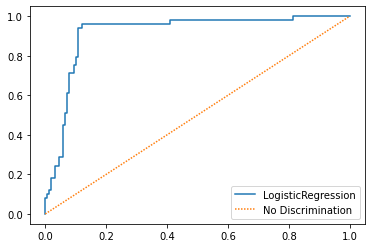

In [95]:
from sklearn.metrics import roc_curve,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_test,lg.predict_proba(x_test)[:,1],pos_label=1)
precision, recall, thresholds = precision_recall_curve(y_test,lg.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='LogisticRegression')
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(1, 1))
plt.legend()

Ploted AUC RUC curve of svc model

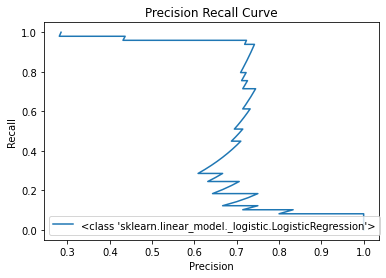

In [97]:
precision, recall, thresholds = precision_recall_curve(y_test,lg.predict_proba(x_test)[:,1],pos_label=1)
plt.plot(precision,recall, label=LogisticRegression)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.legend()

Ploted Precision Recall Curve curve of SVC model.

In [98]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(lg, 'lg_Fraud.obj')
pickle.dump(lg,open('lg_Fraud.pkl','wb'))

Dump the module using both pickle and joblib.